In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image

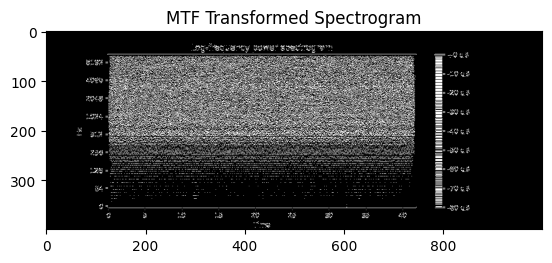

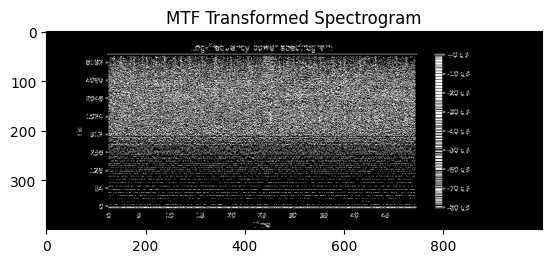

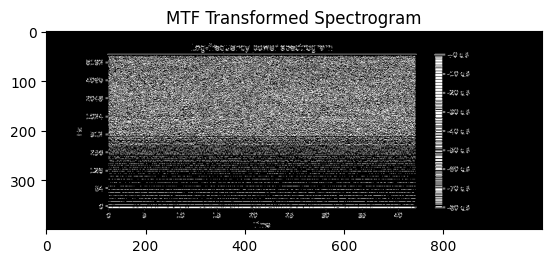

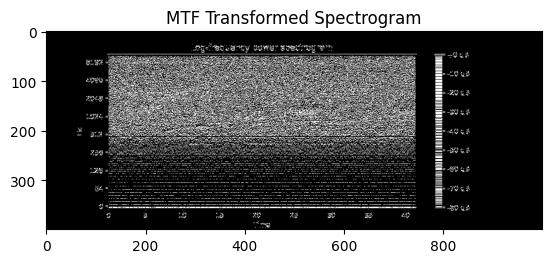

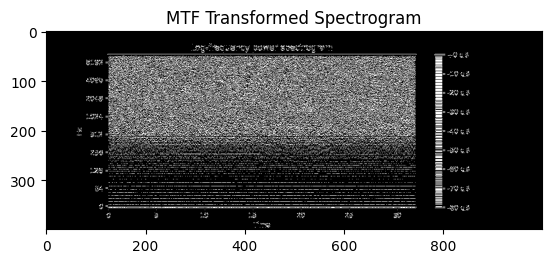

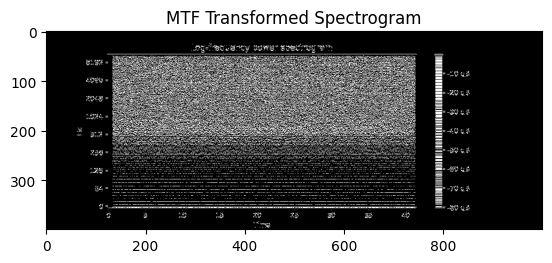

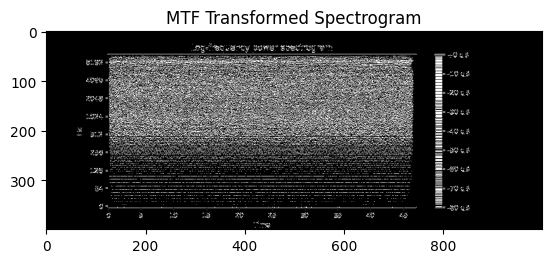

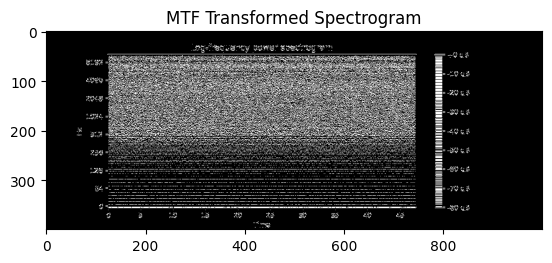

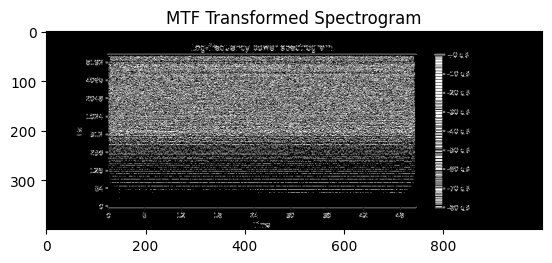

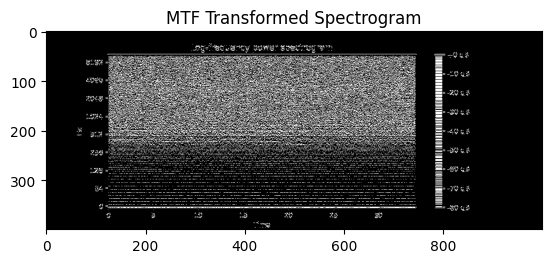

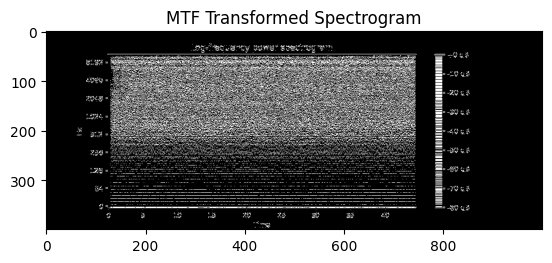

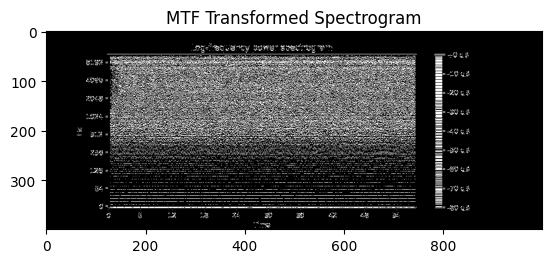

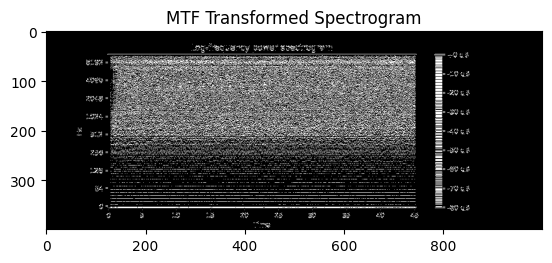

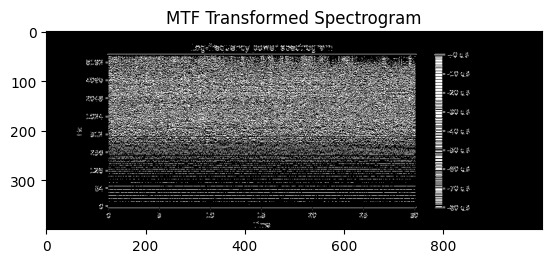

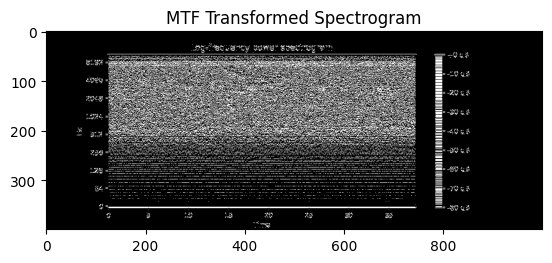

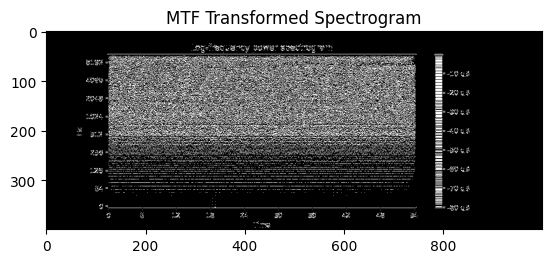

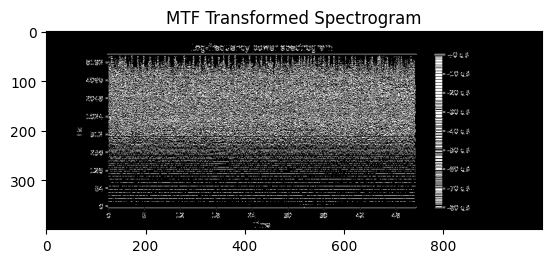

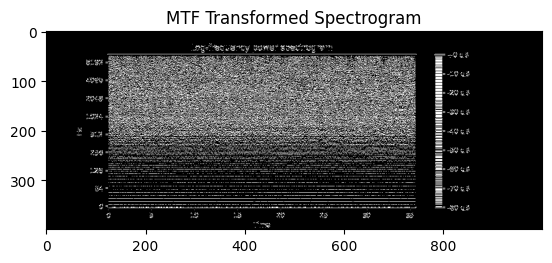

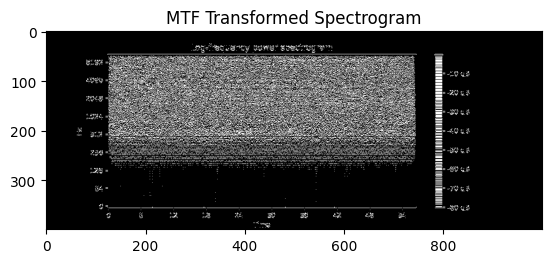

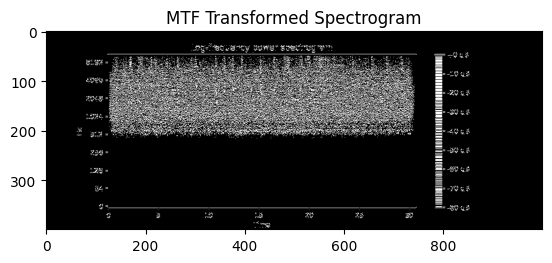

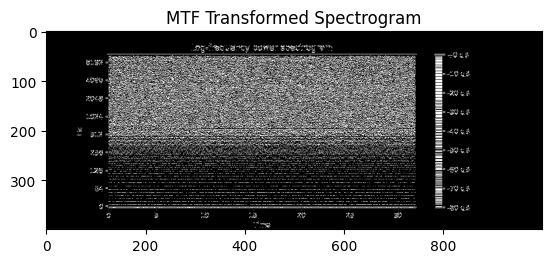

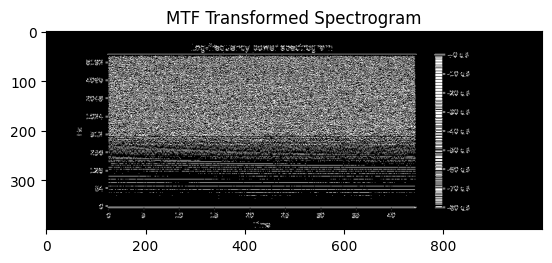

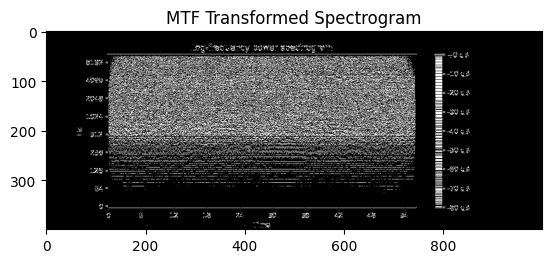

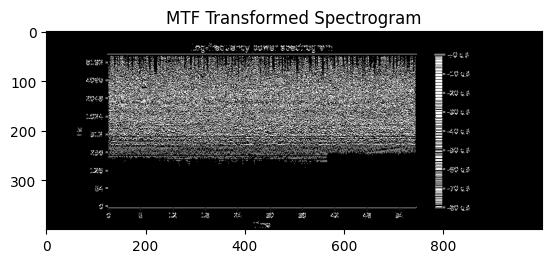

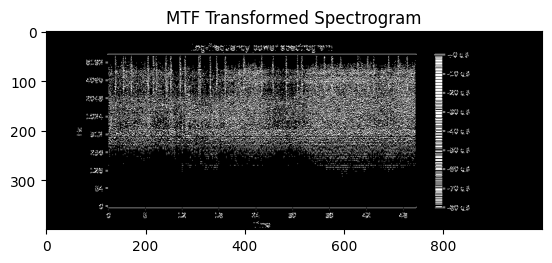

In [10]:
# Function to compute Markov Transition Field (MTF) transformation
def compute_MTF(spectrogram, num_bins=8):
    # Normalize spectrogram
    spectrogram = (spectrogram - np.min(spectrogram)) / (np.max(spectrogram) - np.min(spectrogram))
    
    # Compute transition probabilities
    transitions = np.diff(spectrogram, axis=0)
    mtf = np.zeros_like(transitions)
    
    # Quantize transition values into bins
    bins = np.linspace(-1, 1, num_bins + 1)
    for i in range(num_bins):
        mtf += (transitions >= bins[i]) & (transitions < bins[i + 1]) * i
    
    return mtf.astype(np.uint8)

# Directory containing spectrogram files
spectrogram_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\spectograms\EurasianTreeSparrow_Spectrogram'
# spectrogram_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\spectograms\Golden-belliedGerygone_Spectrograms'
# spectrogram_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\spectograms\ZebraDove_Spectrograms'
# spectrogram_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\spectograms\PhilippinePygmyWoodpecker_Spectrograms'

# Load MTF-transformed spectrograms batch by batch
batch_size = 75  # Adjust batch size as needed
mtf_transformed = []
for filename in os.listdir(spectrogram_dir):
    if filename.endswith('.png'):
        filepath = os.path.join(spectrogram_dir, filename)
        spectrogram = np.array(Image.open(filepath).convert('L'))  # Convert to grayscale
        mtf_transformed.append(compute_MTF(spectrogram))
        
        # Process batch when it reaches the desired size
        if len(mtf_transformed) == batch_size:
            # Process the batch (e.g., save to file, feed into CNN)
            # Reset the batch
            mtf_transformed = []

# Plot the MTF-transformed spectrograms
for mtf_image in mtf_transformed:
    plt.imshow(mtf_image, cmap='gray')
    plt.title('MTF Transformed Spectrogram')
    plt.show()

output_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\mtf_data_set\EurasianTreeSparrow_MTFimage'
# output_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\mtf_data_set\Golden-belliedGerygone_MTFimage'
# output_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\mtf_data_set\ZebraDove_MTFimage'
# output_dir = r'D:\Caleb\School\3rd year boi\2nd Sem\Thesis\BirdSound_MarkovTF_CNN\dataset\data_sets\mtf_data_set\PhilippinePygmyWoodpecker_MTFimage'

# Process the remaining spectrograms (if any)
if len(mtf_transformed) > 0:
    # Process the remaining batch (e.g., save to file, feed into CNN)
    pass

# Save the MTF-transformed spectrograms as images
for i, mtf_image in enumerate(mtf_transformed):
    output_path = os.path.join(output_dir, f'mtf_{i}.png')
    # plt.close()  # Close the plot to release memory
    plt.imsave(output_path, mtf_image, cmap='gray')